In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print('Data Shape',df.shape)

Data Shape (175000, 17)


In [4]:
 print('columns',df.columns.tolist())

columns ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [7]:
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [8]:
df.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,168923,175000.000000,175000.000000,175000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
unique,NaN,109877,109713,NaN,NaN,NaN,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-06-28 19:27:11,2023-06-29 19:08:22,NaN,NaN,NaN,N,NaN,NaN,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,10,NaN,NaN,NaN,167729,NaN,NaN,135257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.728377,NaN,NaN,1.357678,5.145930,1.518307,NaN,132.710349,132.701429,NaN,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,NaN,76.148799,76.192493,NaN,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,NaN,NaN,1.000000,1.080000,1.000000,NaN,67.000000,67.000000,NaN,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,NaN,NaN,1.000000,1.840000,1.000000,NaN,133.000000,133.000000,NaN,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,NaN,NaN,1.000000,3.610000,1.000000,NaN,199.000000,199.000000,NaN,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000


Text(0, 0.5, 'Frequency')

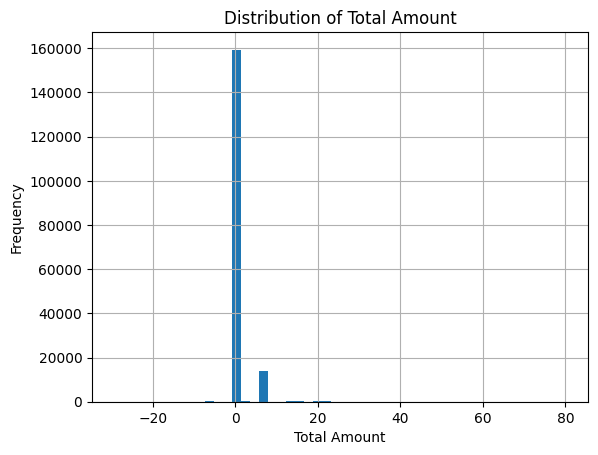

In [9]:
plt.figure
df['tolls_amount'].hist(bins=50)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

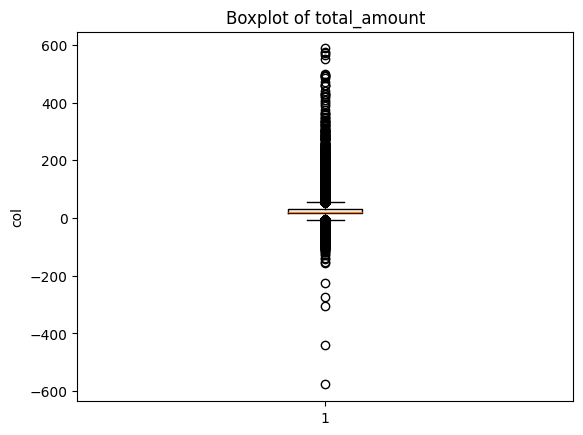

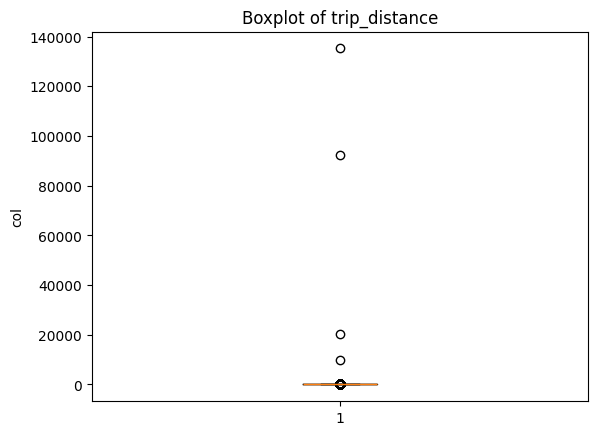

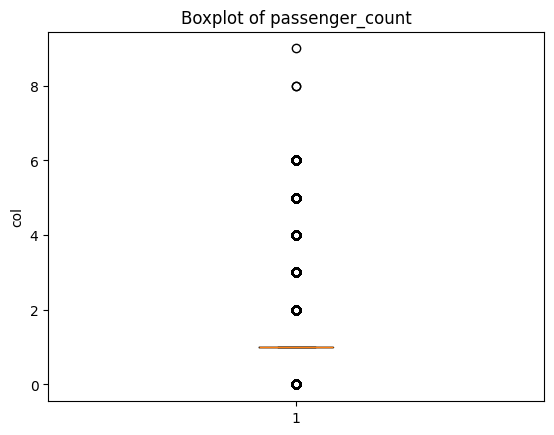

In [15]:
numeric_col = ['total_amount','trip_distance','passenger_count']

for col in numeric_col:
    if col in df.columns:
        plt.figure()
        plt.boxplot(df[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel('col')

In [17]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()

corr

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
VendorID,1.000000,0.099990,0.002857,-0.106361,-0.001315,-0.003946,-0.530096,0.043941,0.023642,-0.063197,0.039695,-0.023495,0.036483
passenger_count,0.099990,1.000000,0.010163,-0.023627,-0.000822,-0.000726,-0.039732,0.017175,0.042856,-0.002800,0.053224,-0.002266,0.040786
trip_distance,0.002857,0.010163,1.000000,0.014745,-0.000958,-0.002496,-0.001849,0.005847,0.006778,0.000459,0.009911,-0.060883,0.126236
RatecodeID,-0.106361,-0.023627,0.014745,1.000000,-0.001090,-0.000644,-0.070959,-0.032172,0.063754,0.002579,0.055527,-0.197608,-0.004480
PULocationID,-0.001315,-0.000822,-0.000958,-0.001090,1.000000,-0.000161,0.001495,0.000748,-0.000868,-0.000501,0.000715,0.001194,-0.000654
DOLocationID,-0.003946,-0.000726,-0.002496,-0.000644,-0.000161,1.000000,0.002955,-0.000247,-0.002290,-0.002810,-0.002954,0.000641,-0.004940
extra,-0.530096,-0.039732,-0.001849,-0.070959,0.001495,0.002955,1.000000,0.160331,0.201179,0.170831,0.234346,0.068088,0.337456
tip_amount,0.043941,0.017175,0.005847,-0.032172,0.000748,-0.000247,0.160331,1.000000,0.411588,0.076436,0.638658,-0.059346,0.335614
tolls_amount,0.023642,0.042856,0.006778,0.063754,-0.000868,-0.002290,0.201179,0.411588,1.000000,0.051190,0.684765,-0.134409,0.437600
improvement_surcharge,-0.063197,-0.002800,0.000459,0.002579,-0.000501,-0.002810,0.170831,0.076436,0.051190,1.000000,0.224036,0.528606,0.083739


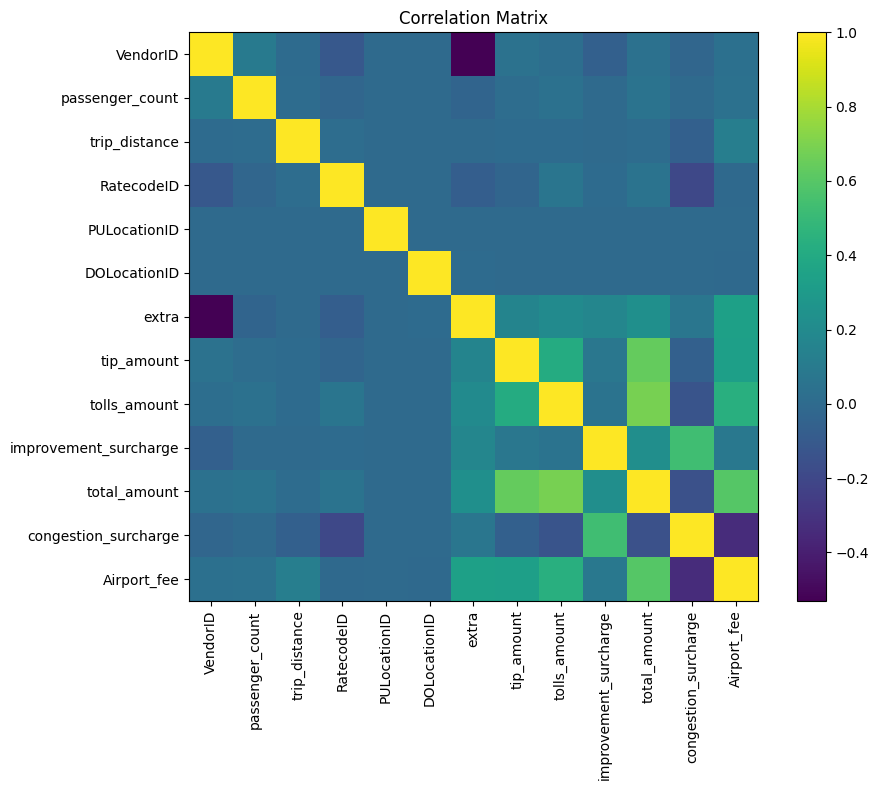

In [19]:
plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.title('Correlation Matrix')
plt.xticks(range(len(corr.columns)),corr.columns,rotation = 90)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.colorbar()
plt.tight_layout()

In [21]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [23]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\nNumeric columns:")
print(df.select_dtypes(include=[np.number]).columns.tolist())

print("\nCategorical columns:")
print(df.select_dtypes(include=["object"]).columns.tolist())


Number of rows: 175000
Number of columns: 17

Numeric columns:
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

Categorical columns:
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type']
